mounting the drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dir = "/content/drive/MyDrive/ComputerScience/PROJECT/CODE/DATASET/Alzheimer_s Dataset/train"
test_dir = "/content/drive/MyDrive/ComputerScience/PROJECT/CODE/DATASET/Alzheimer_s Dataset/test"

Reading the data

printing the sample images in the training data

Displaying image: nonhealthy_0_9718.jpg
Image path: /content/drive/MyDrive/ComputerScience/PROJECT/CODE/DATASET/Alzheimer_s Dataset/train/ModerateDemented/nonhealthy_0_9718.jpg


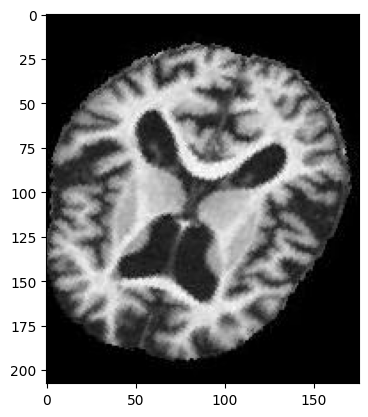

Displaying image: nonhealthy_0_5145.jpg
Image path: /content/drive/MyDrive/ComputerScience/PROJECT/CODE/DATASET/Alzheimer_s Dataset/train/ModerateDemented/nonhealthy_0_5145.jpg


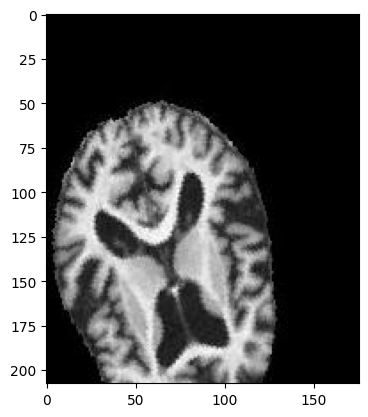

Displaying image: nonhealthy_0_8187.jpg
Image path: /content/drive/MyDrive/ComputerScience/PROJECT/CODE/DATASET/Alzheimer_s Dataset/train/ModerateDemented/nonhealthy_0_8187.jpg


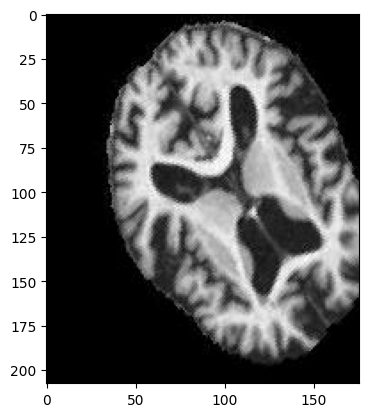

Displaying image: nonhealthy_0_1675.jpg
Image path: /content/drive/MyDrive/ComputerScience/PROJECT/CODE/DATASET/Alzheimer_s Dataset/train/ModerateDemented/nonhealthy_0_1675.jpg


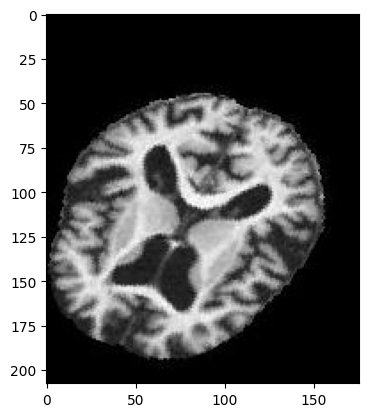

Displaying image: nonhealthy_0_7833.jpg
Image path: /content/drive/MyDrive/ComputerScience/PROJECT/CODE/DATASET/Alzheimer_s Dataset/train/ModerateDemented/nonhealthy_0_7833.jpg


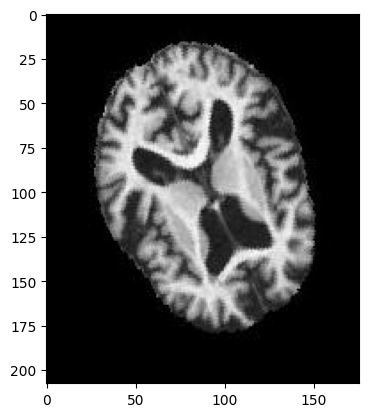

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
# Specify the train directory
train_dir = "/content/drive/MyDrive/ComputerScience/PROJECT/CODE/DATASET/Alzheimer_s Dataset/train/ModerateDemented"

# List all image files in the train directory
train_images = os.listdir(train_dir)

# Loop through and display the first 5 images
for img_name in train_images[:5]:
    img_path = os.path.join(train_dir, img_name)
    print(f"Displaying image: {img_name}")
    print(f"Image path: {img_path}")
    img = Image.open(img_path)
    # img.show()
    plt.imshow(img)
    plt.show()


In [1]:
%pip install tensorflow keras

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator





In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dir = "/content/drive/MyDrive/ComputerScience/PROJECT/CODE/DATASET/Alzheimer_s Dataset/train"
test_dir = "/content/drive/MyDrive/ComputerScience/PROJECT/CODE/DATASET/Alzheimer_s Dataset/test"

# Load training data
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),          # Resize images to 150x150
    batch_size=32,                  # Load images in batches of 32
    label_mode='categorical',       # Use 'categorical' for multi-class classification
    shuffle=True)                   # Shuffle the data to prevent any ordering bias

# Load test data
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(150, 150),          # Resize images to 150x150
    batch_size=32,
    label_mode='categorical')       # Use 'categorical' for multi-class classification


Found 8061 files belonging to 4 classes.
Found 4397 files belonging to 4 classes.


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Fourth Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten Layer - Convert 3D feature maps to 1D
    layers.Flatten(),

    # Fully Connected Dense Layer
    layers.Dense(512, activation='relu'),

    # Output Layer - For 4 classes, use 'softmax' activation
    layers.Dense(4, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.count_params()

3454660

In [7]:
model.compile(
    optimizer='adam',                     # Adam optimizer
    loss='categorical_crossentropy',      # Use categorical crossentropy for multi-class classification
    metrics=['accuracy']                  # Track accuracy during training
)


In [8]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,454,660 (13.18 MB)

 Trainable params: 3,454,660 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_dataset,           # Training data
    validation_data=test_dataset,  # Validation (test) data
    epochs=20                # Number of epochs (can be adjusted based on your needs)
)


Epoch 1/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1805s 7s/step - accuracy: 0.4702 - loss: 9.8642 - val_accuracy: 0.4314 - val_loss: 1.0731
Epoch 2/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 57s 152ms/step - accuracy: 0.5322 - loss: 0.9111 - val_accuracy: 0.4580 - val_loss: 1.0707
Epoch 3/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 37s 148ms/step - accuracy: 0.5495 - loss: 0.9463 - val_accuracy: 0.4210 - val_loss: 1.4619
Epoch 4/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 49s 181ms/step - accuracy: 0.5749 - loss: 0.8488 - val_accuracy: 0.4842 - val_loss: 1.2747
Epoch 5/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 83s 184ms/step - accuracy: 0.5586 - loss: 0.8913 - val_accuracy: 0.4951 - val_loss: 1.2640
Epoch 6/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 81s 180ms/step - accuracy: 0.5901 - loss: 0.8179 - val_accuracy: 0.5385 - val_loss: 1.0997
Epoch 7/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 82s 181ms/step - accuracy: 0.6182 - loss: 0.7837 - val_accuracy: 0.5338 - val_loss: 1.3882
Epoch 8/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 38s 151ms/step - accuracy: 0.6463 - loss: 0.

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
print("Test accuracy:", test_acc)


In [ ]:
model.save('my_cnn_model.h5')
from google.colab import files
files.download('my_cnn_model.h5')
